# 1. Preparation and visualization

## 1.1 Import Libraries

In [1]:
import nltk
import pandas as pd
import string

## 1.2 Load csv files to data frames


In [2]:
#train_df = pd.read_csv('data/train.csv',encoding = "latin1")
#test_df = pd.read_csv('data/test.csv',encoding = "latin1")
#attributes_df = pd.read_csv('data/attributes.csv',encoding = "latin1")
#product_descriptions_df = pd.read_csv('data/product_descriptions.csv',encoding = "latin1")
#sample_submission_df = pd.read_csv('data/sample_submission.csv', encoding = "latin1")
from pyspark.sql import SparkSession
spark  = SparkSession.builder.appName("task14").getOrCreate()
train_df = spark.read.option("header", "true").option("mode", "DROPMALFORMED").csv("data/train.csv")
product_descriptions_df = spark.read.option("header", "true").option("mode", "DROPMALFORMED").csv("data/product_descriptions.csv")

In [3]:
merged_df = train_df.join(product_descriptions_df,'product_uid')
merged_rdd = merged_df.rdd.map(list)

In [4]:
print(merged_rdd.first())

['100001', '3', 'Simpson Strong-Tie 12-Gauge Angle', 'l bracket', '2.5', '"Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a ""Z"" at the end of the model number).Versatile connector for various 90 connections and home repair projectsStronger than angled nailing or screw fastening aloneHelp ensure joints are consistently straight and strongDimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steelGalvanized for extra corrosion resistanceInstall with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws"']


In [26]:
#print(train_df.dtypes)

id                 int64
product_uid        int64
product_title     object
search_term       object
relevance        float64
dtype: object


In [28]:
#print(product_descriptions_df.dtypes)

product_uid             int64
product_description    object
dtype: object


In [29]:
#print(product_descriptions_df.head())

   product_uid                                product_description
0       100001  Not only do angles make joints stronger, they ...
1       100002  BEHR Premium Textured DECKOVER is an innovativ...
2       100003  Classic architecture meets contemporary design...
3       100004  The Grape Solar 265-Watt Polycrystalline PV So...
4       100005  Update your bathroom with the Delta Vero Singl...


## 1.3 Visualization

In [56]:
import matplotlib.pyplot as plt
%pylab inline
import seaborn
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [57]:
train = pd.read_csv('data/train.csv', encoding="ISO-8859-1")
test = pd.read_csv('data/test.csv', encoding="ISO-8859-1")
descr = pd.read_csv('data/product_descriptions.csv')
attr = pd.read_csv('data/attributes.csv')

In [67]:
train = pd.merge(train, descr, how='left', on='product_uid')
test = pd.merge(test, descr, how='left', on='product_uid')
train.describe()

,id,product_uid,relevance
count,74067.000000,74067.000000,74067.000000
mean,112385.709223,142331.911553,2.381634
std,64016.573650,30770.774864,0.533984
min,2.000000,100001.000000,1.000000
25%,57163.500000,115128.500000,2.000000
50%,113228.000000,137334.000000,2.330000
75%,168275.500000,166883.500000,3.000000
max,221473.000000,206650.000000,3.000000


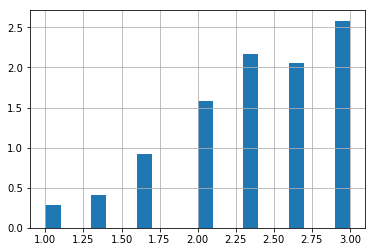

In [68]:
train.relevance.hist(bins=20, normed=True);

In [62]:
# Only ~16% of rates are lower than 2 (worse than "relevant"). ~
# 58% are between 2 and 3. 26% are pefect matches (3.0)
train.relevance.value_counts(normalize=True)

3.00    0.258212
2.33    0.216831
2.67    0.205247
2.00    0.158370
1.67    0.091539
1.33    0.040585
1.00    0.028420
2.50    0.000257
2.25    0.000149
2.75    0.000149
1.75    0.000122
1.50    0.000068
1.25    0.000054
Name: relevance, dtype: float64

In [63]:
for col in train.drop(['id', 'product_uid', 'relevance'], axis=1).columns:
    print(col)
    print(train[col].value_counts(normalize=False)[:3])

product_title
Pressure-Treated Timber #2 Southern Yellow Pine (Common: 4 in. x 4 in. x 8 ft.; Actual: 3.56 in. x 3.56 in. x 96 in.)    21
Lithonia Lighting All Season 4 ft. 2-Light Grey T8 Strip Fluorescent Shop Light                                          21
2 in. x 4 in. x 96 in. Premium Kiln-Dried Whitewood Stud                                                                 18
Name: product_title, dtype: int64
search_term
bed frames headboaed                    16
burgundy red foot stools                16
everblit heavy duty canvas dropcloth    16
Name: search_term, dtype: int64


In [64]:
train['search_term'].value_counts(normalize=True)[:10]

bed frames headboaed                           0.000216
burgundy red foot stools                       0.000216
everblit heavy duty canvas dropcloth           0.000216
metal sheet                                    0.000216
contact paoer                                  0.000216
1/2 zip wall                                   0.000216
anderson windows 400 seriesimpact resistant    0.000216
3 WAY TOGGLE SWITCH                            0.000216
moen chat oil bronze tub/shower faucet         0.000216
48 bath vanity                                 0.000203
Name: search_term, dtype: float64

In [65]:
test['search_term'].value_counts(normalize=True)[:10]

patio chair cushions         0.000216
outdoor chairs               0.000138
metal                        0.000138
block wall                   0.000138
popcorn machine              0.000138
hot water heater electric    0.000138
pliers                       0.000138
dual flush toilet            0.000138
windows for homes            0.000138
ball valve                   0.000138
Name: search_term, dtype: float64

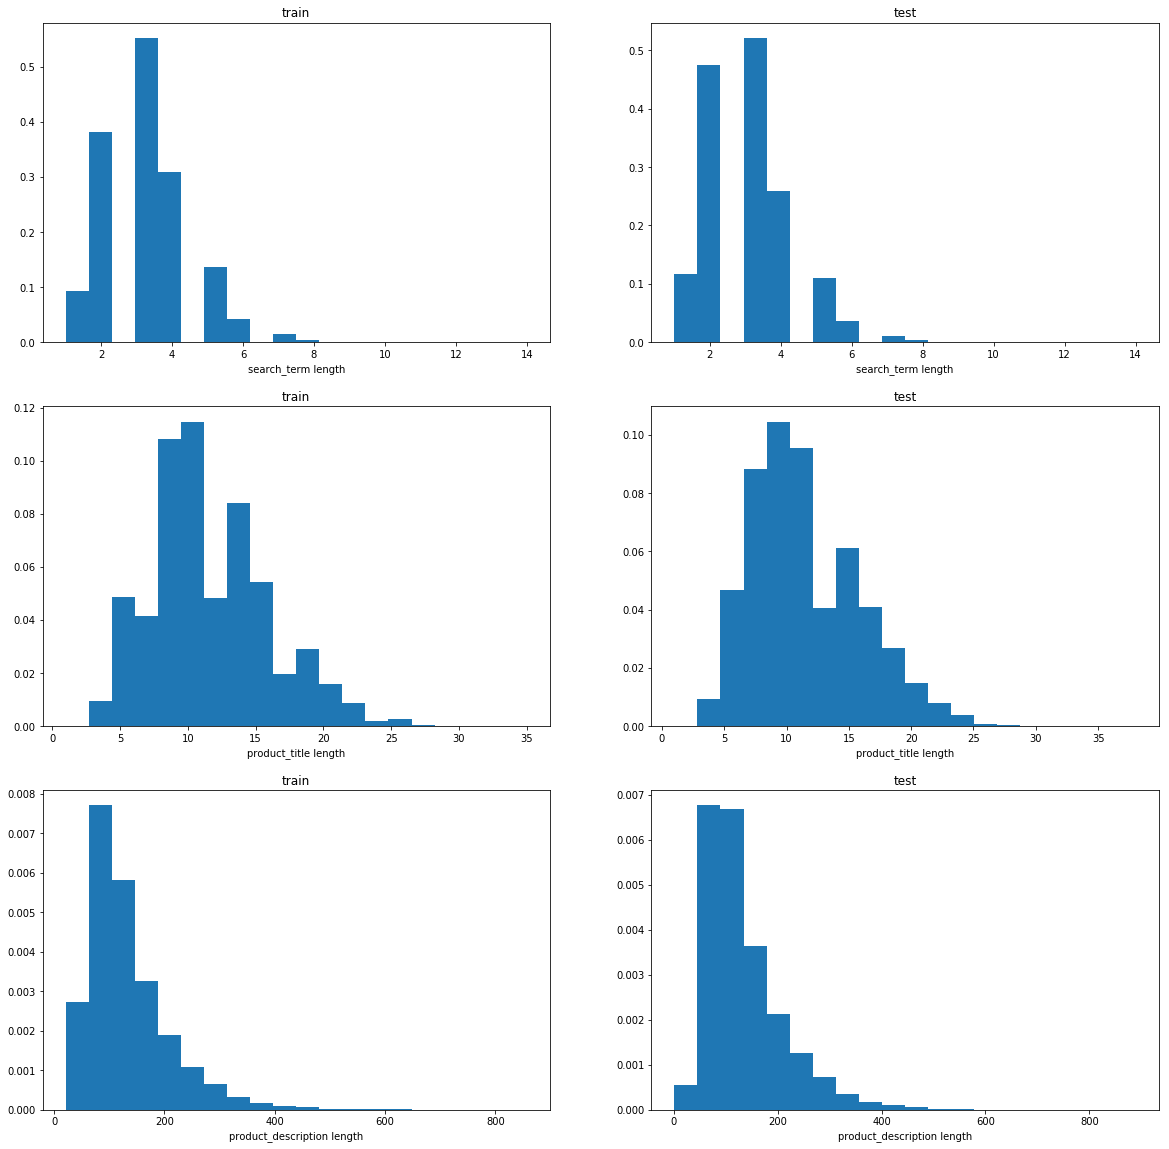

In [69]:
predictors = ['search_term', 'product_title', 'product_description']
fig, ax = plt.subplots(figsize=(20,20), nrows=len(predictors), ncols=2)
for i, feat in enumerate(predictors):
    for j, df in enumerate([train, test]):
        ax[i][j].hist(df[feat].apply(lambda x: len(x.split())), normed=True, bins=20)
        ax[i][j].set_xlabel(feat + ' length')
        ax[i][0].set_title('train')
        ax[i][1].set_title('test')

# 2. Data Cleaning
## 2.1 Download NLTK's stopwords list and WordNetLemmatizer

In [4]:
lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()
stopwords=nltk.corpus.stopwords.words('english')
# nltk.download('stopwords')
# nltk.download('wordnet')


Process and tokenize the raw text by:
    1. Convert to lower case
    2. Remove apostrophe
    3. Remove Punctuation
    4. Lemmatize

In [5]:
def process(text, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
   
    # convert text to lower case
    lowercase = str(text).lower()
    
    #remove 's from string
    apoRemoved = lowercase.replace("'s","")
    
    #convert don't to dont
    apoRemoved = apoRemoved.replace("'","")
    
    #handle other punctuations
    transtable = str.maketrans(string.punctuation,"                                ")
    brokenWords = apoRemoved.translate(transtable)
    
    #convert string to list of words
    listOfWords =  nltk.word_tokenize(brokenWords)
    
    #lemmatize text
    lemmatizedList=[lemmatizer.lemmatize(word) for word in listOfWords]
   
    return lemmatizedList


In [7]:
# test case
text = "Dogs Here's don't cars."
print(process(text))

['dog', 'here', 'dont', 'car']


In [6]:
# process train_df
def process_train_df(df, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    
    newdf=df
    for i,row in newdf.iterrows():
#         if i>5:
#             break
#         print("raw: ",text)
        newdf.at[i,'product_title'] = process(row['product_title'])
#         print("processed: ",df.iloc[i]['product_title'])
    return newdf

In [9]:
#processed_train_df = process_train_df(train_df)
#print(processed_train_df.head())

In [7]:
# process 
def process_product_descriptions_df(df, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    
    newdf=df
    for i,row in newdf.iterrows():
#         if i>5:
#             break
#         print("raw: ",text)
        newdf.at[i,'product_description'] = process(row['product_description'])
#         print("processed: ",df.iloc[i]['product_title'])
    return newdf

In [11]:
#processed_product_descriptions_df = process_product_descriptions_df(product_descriptions_df)
#print(processed_product_descriptions_df.head())

In [8]:
processed_rdd = merged_rdd.map(lambda row: [row[0], row[1], process(row[2]), process(row[3]), float(row[4]), process(row[5])])

In [13]:
processed_rdd.first()

['100001',
 '3',
 ['simpson', 'strong', 'tie', '12', 'gauge', 'angle'],
 ['l', 'bracket'],
 2.5,
 ['not',
  'only',
  'do',
  'angle',
  'make',
  'joint',
  'stronger',
  'they',
  'also',
  'provide',
  'more',
  'consistent',
  'straight',
  'corner',
  'simpson',
  'strong',
  'tie',
  'offer',
  'a',
  'wide',
  'variety',
  'of',
  'angle',
  'in',
  'various',
  'size',
  'and',
  'thickness',
  'to',
  'handle',
  'light',
  'duty',
  'job',
  'or',
  'project',
  'where',
  'a',
  'structural',
  'connection',
  'is',
  'needed',
  'some',
  'can',
  'be',
  'bent',
  'skewed',
  'to',
  'match',
  'the',
  'project',
  'for',
  'outdoor',
  'project',
  'or',
  'those',
  'where',
  'moisture',
  'is',
  'present',
  'use',
  'our',
  'zmax',
  'zinc',
  'coated',
  'connector',
  'which',
  'provide',
  'extra',
  'resistance',
  'against',
  'corrosion',
  'look',
  'for',
  'a',
  'z',
  'at',
  'the',
  'end',
  'of',
  'the',
  'model',
  'number',
  'versatile',
  'conn

# 3. Feature Engineering

## 3.1 Iteration 1: Calculating the tfidf similarities between description, title and search

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

def dummy_fun(doc):
    return doc
def tfidf_sim(row, stopwords=nltk.corpus.stopwords.words('english')):
    title = row[2]
    search = row[3]
    relevance = row[4]
    desc = row[5]
    title_search = []
    title_search.append(title)
    title_search.append(search)
    desc_search = []
    desc_search.append(desc)
    desc_search.append(search)
    vect = TfidfVectorizer(analyzer='word',tokenizer=dummy_fun,preprocessor=dummy_fun,token_pattern=None,stop_words=stopwords,use_idf=False)
    tfidf1 = vect.fit_transform(title_search)
    tfidf2 = vect.fit_transform(desc_search)
    title_sim_value = (tfidf1 * tfidf1.T).A[0,1]
    desc_sim_value = (tfidf2 * tfidf2.T).A[0,1]
    row.append(float(title_sim_value))
    row.append(float(desc_sim_value))
    return row

In [10]:
new_rdd = processed_rdd.map(tfidf_sim)

In [16]:
new_rdd.take(2)

[['100001',
  '3',
  ['simpson', 'strong', 'tie', '12', 'gauge', 'angle'],
  ['l', 'bracket'],
  2.5,
  ['not',
   'only',
   'do',
   'angle',
   'make',
   'joint',
   'stronger',
   'they',
   'also',
   'provide',
   'more',
   'consistent',
   'straight',
   'corner',
   'simpson',
   'strong',
   'tie',
   'offer',
   'a',
   'wide',
   'variety',
   'of',
   'angle',
   'in',
   'various',
   'size',
   'and',
   'thickness',
   'to',
   'handle',
   'light',
   'duty',
   'job',
   'or',
   'project',
   'where',
   'a',
   'structural',
   'connection',
   'is',
   'needed',
   'some',
   'can',
   'be',
   'bent',
   'skewed',
   'to',
   'match',
   'the',
   'project',
   'for',
   'outdoor',
   'project',
   'or',
   'those',
   'where',
   'moisture',
   'is',
   'present',
   'use',
   'our',
   'zmax',
   'zinc',
   'coated',
   'connector',
   'which',
   'provide',
   'extra',
   'resistance',
   'against',
   'corrosion',
   'look',
   'for',
   'a',
   'z',
   'at',

In [11]:
new_df = new_rdd.toDF(["product_id","id","title","search_term","label","descriptions","title_sim","desc_sim"])

In [18]:
#new_df.show()
new_df.select(new_df["title_sim"],new_df["desc_sim"]).show()

+-------------------+-------------------+
|          title_sim|           desc_sim|
+-------------------+-------------------+
|                0.0|                0.0|
| 0.2886751345948129|0.11826247919781652|
|                0.0|0.22808577638091165|
|0.42640143271122083|0.15339299776947407|
|0.17407765595569785|0.06262242910851495|
| 0.2886751345948129|0.13784910335911552|
| 0.2041241452319315|0.09747403576571587|
| 0.2041241452319315|0.09747403576571587|
| 0.4472135954999579|0.24077170617153837|
| 0.5773502691896258|0.27407548393101266|
|0.26726124191242434|0.36293309315564887|
| 0.3721042037676254| 0.1900028500641266|
|                0.0|                0.0|
|  0.282842712474619| 0.7009039702739965|
|                0.0|0.14213381090374028|
|                0.0|                0.0|
|                0.0|                0.0|
|                0.0|0.07106690545187014|
| 0.3481553119113957| 0.2057377999494559|
|0.17407765595569785| 0.3086066999241839|
+-------------------+-------------

In [12]:
# Features optimization 1 - "title_sim"
from pyspark.ml.feature import VectorAssembler
# delete desct_sim
assembler = VectorAssembler(inputCols=["title_sim"],outputCol="features")
final_df = assembler.transform(new_df).drop('product_id')

In [20]:
final_df.select("features").show(truncate=False)

+---------------------+
|features             |
+---------------------+
|[0.0]                |
|[0.2886751345948129] |
|[0.0]                |
|[0.42640143271122083]|
|[0.17407765595569785]|
|[0.2886751345948129] |
|[0.2041241452319315] |
|[0.2041241452319315] |
|[0.4472135954999579] |
|[0.5773502691896258] |
|[0.26726124191242434]|
|[0.3721042037676254] |
|[0.0]                |
|[0.282842712474619]  |
|[0.0]                |
|[0.0]                |
|[0.0]                |
|[0.0]                |
|[0.3481553119113957] |
|[0.17407765595569785]|
+---------------------+
only showing top 20 rows



In [13]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(maxIter=5)

In [20]:
lrModel = lr.fit(final_df)
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.0]
Intercept: 2.381798094242825
numIterations: 1
objectiveHistory: [0.4999999999999982]
+--------------------+
|           residuals|
+--------------------+
| 0.11820190575717504|
|   0.618201905757175|
|   0.618201905757175|
| 0.28820190575717497|
|-0.05179809424282489|
|   0.618201905757175|
| 0.28820190575717497|
|   0.618201905757175|
| 0.28820190575717497|
|   0.618201905757175|
| 0.28820190575717497|
| 0.28820190575717497|
| 0.28820190575717497|
|   0.618201905757175|
|-0.05179809424282489|
|-0.05179809424282489|
|  -0.711798094242825|
|  -1.381798094242825|
|-0.05179809424282489|
|-0.05179809424282489|
+--------------------+
only showing top 20 rows

RMSE: 0.534005
r2: -0.000000


In [ ]:
# Features optimization 2 - "desc_sim"

In [23]:
assembler = VectorAssembler(inputCols=["desc_sim"],outputCol="features")
final_df = assembler.transform(new_df).drop('product_id')
lrModel = lr.fit(final_df)
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.834621736855]
Intercept: 2.214378992500123
numIterations: 1
objectiveHistory: [0.0]
+--------------------+
|           residuals|
+--------------------+
| 0.28562100749987707|
|  0.6869165717070276|
|    0.59525566066494|
| 0.32759587728013706|
| 0.06335496695125498|
|     0.6705691494304|
| 0.37426705847083763|
|  0.7042670584708377|
| 0.25466770790946747|
|  0.5568716510720253|
|  0.1527091589281846|
|  0.2970404987719726|
|   0.455621007499877|
|   0.200631318461292|
|-0.00300696062241...|
| 0.11562100749987714|
|  -0.544378992500123|
| -1.2736929765612666|
|-0.05609223243064587|
|-0.14194885239590738|
+--------------------+
only showing top 20 rows

RMSE: 0.520745
r2: 0.049048


In [24]:
# Features optimization 3 - "desc_sim, title_sim"
assembler = VectorAssembler(inputCols=["title_sim","desc_sim"],outputCol="features")
final_df = assembler.transform(new_df).drop('product_id')
lrModel = lr.fit(final_df)
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.750607156948,0.383934451293]
Intercept: 2.0528862643397696
numIterations: 1
objectiveHistory: [0.0]
+--------------------+
|           residuals|
+--------------------+
|  0.4471137356602304|
|  0.6850270735411228|
|  0.8595437482576194|
| 0.23816091210357548|
|  0.1224068932767719|
|  0.6775070937410663|
|  0.4264730509062562|
|  0.7564730509062563|
|  0.1889914572977247|
| 0.40852347100481445|
| 0.27716301672913923|
| 0.26486101719839006|
|  0.6171137356602303|
|  0.4657087901498387|
| 0.22254366896067745|
| 0.27711373566023045|
| -0.3828862643397697|
|  -1.080171297689546|
|-0.06320396252370841|
|0.027965057234376367|
+--------------------+
only showing top 20 rows

RMSE: 0.507310
r2: 0.097482


In [25]:
# Try word2vec
#train_rdd = train_df.rdd.map(tuple)
#product_desc_rdd = product_descriptions_df.rdd.map(tuple)
#title_rdd = train_rdd.map(lambda row: process(row[2]))
#desc_rdd = product_desc_rdd.map(lambda row: process(row[1]))

In [26]:
#print(title_rdd.first())
#print(desc_rdd.first())

In [27]:
#corpus_rdd = title_rdd.union(desc_rdd)

In [28]:
#corpus_rdd.saveAsTextFile("corpus")

In [29]:
#from pyspark.sql import Row
#corpus_df = corpus_rdd.map(lambda x: Row(x)).toDF(["corpus"])

## 3.2 Iteration 2: Adding features like diceCoefficent, overlap and search length

In [ ]:
# Adding diceCoefficient & overlap & search length

In [14]:
def diceCoefficient(row):
    title_set = set(row[2])
    search_set = set(row[3])
    desc_set = set(row[5])
    overlap_title = len(title_set & search_set)
    dice_title = float(overlap_title * 2.0/(len(title_set) + len(search_set)))
    overlap_desc = len(desc_set & search_set)
    dice_desc = float(overlap_desc * 2.0/(len(desc_set) + len(search_set)))
    row.append(dice_title)
    row.append(dice_desc)
    row.append(len(row[3]))
    row.append(overlap_title)
    row.append(overlap_desc)
    return row

In [15]:
new_rdd2 = new_rdd.map(diceCoefficient)

In [23]:
new_rdd2.take(2)

[['100001',
  '3',
  ['simpson', 'strong', 'tie', '12', 'gauge', 'angle'],
  ['l', 'bracket'],
  2.5,
  ['not',
   'only',
   'do',
   'angle',
   'make',
   'joint',
   'stronger',
   'they',
   'also',
   'provide',
   'more',
   'consistent',
   'straight',
   'corner',
   'simpson',
   'strong',
   'tie',
   'offer',
   'a',
   'wide',
   'variety',
   'of',
   'angle',
   'in',
   'various',
   'size',
   'and',
   'thickness',
   'to',
   'handle',
   'light',
   'duty',
   'job',
   'or',
   'project',
   'where',
   'a',
   'structural',
   'connection',
   'is',
   'needed',
   'some',
   'can',
   'be',
   'bent',
   'skewed',
   'to',
   'match',
   'the',
   'project',
   'for',
   'outdoor',
   'project',
   'or',
   'those',
   'where',
   'moisture',
   'is',
   'present',
   'use',
   'our',
   'zmax',
   'zinc',
   'coated',
   'connector',
   'which',
   'provide',
   'extra',
   'resistance',
   'against',
   'corrosion',
   'look',
   'for',
   'a',
   'z',
   'at',

In [16]:
new_df2 = new_rdd2.toDF(["product_id","id","title","search_term","label","descriptions","title_sim","desc_sim","dice_title","dice_desc","search_length","overlap_title","overlap_desc"])

In [ ]:
new_df2.select(new_df2["title_sim"],new_df2["desc_sim"],new_df2["dice_title"],new_df2["dice_desc"],new_df2["search_length"],new_df2["overlap_title"],new_df2["overlap_desc"]).show()

In [17]:
# Features optimization 4 - "desc_sim, title_sim, dice_title"
assembler2 = VectorAssembler(inputCols=["title_sim","desc_sim","dice_title"],outputCol="features")
final_df2 = assembler2.transform(new_df2)

In [42]:
lrModel = lr.fit(final_df2)
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [1.25672083615,0.386217257614,-0.629575113796]
Intercept: 2.0508369390315
numIterations: 1
objectiveHistory: [0.0]
+--------------------+
|           residuals|
+--------------------+
|     0.4491630609685|
|  0.6980977725001596|
|  0.8610723979139037|
|  0.2462554543212896|
| 0.11027784123244988|
|  0.6072069622281968|
| 0.45753196893299597|
|  0.7249426301345201|
|  0.1740086004920478|
|  0.3695723116579366|
| 0.28302484647016257|
| 0.26702210932390447|
|  0.6191630609684999|
|  0.5167229412288039|
|  0.2242685303070302|
|  0.2791630609685001|
|-0.38083693903150007|
| -1.0782842043622347|
|-0.06994376559767757|
|0.025150158801394262|
+--------------------+
only showing top 20 rows

RMSE: 0.506218
r2: 0.101363


In [27]:
# Features optimization 5 - "desc_sim, title_sim, dice_title, dice_desc"
assembler2 = VectorAssembler(inputCols=["title_sim","desc_sim","dice_title", "dice_desc"],outputCol="features")
final_df2 = assembler2.transform(new_df2)

In [44]:
lrModel = lr.fit(final_df2)
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [1.15134844323,0.54986352137,-0.413602170541,-1.38904425294]
Intercept: 2.059537263139896
numIterations: 1
objectiveHistory: [0.0]
+--------------------+
|           residuals|
+--------------------+
|  0.4404627368601042|
|  0.6737055512459604|
|  0.8374506282484608|
|  0.2769542892479602|
| 0.11619603996746619|
|  0.5907745227010874|
| 0.42841680257650605|
|  0.7075851019820618|
|  0.1566016419874856|
|  0.4167449110001602|
| 0.23315585380849235|
| 0.23952918116991606|
|  0.6104627368601041|
| 0.41706612964631384|
|  0.2897853287708667|
| 0.27046273686010425|
| -0.3895372631398959|
| -1.0498759671845144|
|-0.05151065305807023|
| 0.07805681620898586|
+--------------------+
only showing top 20 rows

RMSE: 0.505061
r2: 0.105466


In [45]:
# Features optimization 6 - "desc_sim, title_sim, dice_title, dice_desc, length"
assembler2 = VectorAssembler(inputCols=["title_sim","desc_sim","dice_title","dice_desc","search_length"],outputCol="features")
final_df2 = assembler2.transform(new_df2)
lrModel = lr.fit(final_df2)
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.812656456634,0.453785887724,0.123381519568,-0.353887523512,-0.0704905741084]
Intercept: 2.229513247931489
numIterations: 1
objectiveHistory: [0.0]
+-------------------+
|          residuals|
+-------------------+
|0.41146790028531255|
| 0.5993019353370994|
| 0.8136736570554226|
|  0.216692636752581|
| 0.1356958412188427|
| 0.5318151354460925|
|0.42083511365014736|
| 0.6901358617863695|
| 0.0818064097348623|
|  0.371218448837487|
|0.18185984370471742|
| 0.4474537230434925|
| 0.5109773261769117|
| 0.3409764830038138|
|0.20180379490496936|
|0.24146790028531262|
| -0.277550951497886|
|-1.1083641524048593|
|-0.0764179233348008|
|0.04522627848866945|
+-------------------+
only showing top 20 rows

RMSE: 0.498900
r2: 0.127157


In [52]:
# Features optimization 7 - "desc_sim, title_sim, dice_title, dice_desc, length, overlap"
assembler2 = VectorAssembler(inputCols=["title_sim","desc_sim","dice_title","dice_desc","search_length","overlap_title","overlap_desc"],outputCol="features")
final_df2 = assembler2.transform(new_df2)
lrModel = lr.fit(final_df2)
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.550540148443,0.260441596816,0.0798898998219,-1.4094141844,-0.115189328945,0.0511733971402,0.0800311166064]
Intercept: 2.3077846240688498
numIterations: 1
objectiveHistory: [0.0]
+--------------------+
|           residuals|
+--------------------+
|  0.4225940338206682|
|  0.6093248969842651|
|  0.8058923802478146|
| 0.10847333918790891|
| 0.14743413936913985|
|  0.4819330116066922|
| 0.31057182996497934|
|  0.6546734858013208|
| 0.05101560022024065|
|  0.3511072642282822|
| 0.24058937813194614|
|  0.4198664578297975|
| 0.47740470487590914|
| 0.35862155812791174|
|  0.1544205024888612|
| 0.25259403382066825|
| -0.1770273082898144|
| -1.1264927318452354|
|-0.07827907952960311|
| 0.01401394399024003|
+--------------------+
only showing top 20 rows

RMSE: 0.495088
r2: 0.140445


## 3.3 Iteration 3: Adding feature ratio - the ratio bewteen description length, title length and search length

In [ ]:
# Features optimization 8 - "desc_sim, title_sim, dice_title, dice_desc, length, overlap, ratio"

In [18]:
def ratio(row):
    title_set = set(row[2])
    search_set = set(row[3])
    desc_set = set(row[5])
    ratio_title_search = float(len(search_set)/len(title_set))
    ratio_desc_search = float(len(search_set)/len(desc_set))
    row.append(ratio_title_search)
    row.append(ratio_desc_search)
    return row

In [20]:
new_rdd3 = new_rdd2.map(ratio)
new_rdd3.take(2)

[['100001',
  '3',
  ['simpson', 'strong', 'tie', '12', 'gauge', 'angle'],
  ['l', 'bracket'],
  2.5,
  ['not',
   'only',
   'do',
   'angle',
   'make',
   'joint',
   'stronger',
   'they',
   'also',
   'provide',
   'more',
   'consistent',
   'straight',
   'corner',
   'simpson',
   'strong',
   'tie',
   'offer',
   'a',
   'wide',
   'variety',
   'of',
   'angle',
   'in',
   'various',
   'size',
   'and',
   'thickness',
   'to',
   'handle',
   'light',
   'duty',
   'job',
   'or',
   'project',
   'where',
   'a',
   'structural',
   'connection',
   'is',
   'needed',
   'some',
   'can',
   'be',
   'bent',
   'skewed',
   'to',
   'match',
   'the',
   'project',
   'for',
   'outdoor',
   'project',
   'or',
   'those',
   'where',
   'moisture',
   'is',
   'present',
   'use',
   'our',
   'zmax',
   'zinc',
   'coated',
   'connector',
   'which',
   'provide',
   'extra',
   'resistance',
   'against',
   'corrosion',
   'look',
   'for',
   'a',
   'z',
   'at',

In [21]:
new_df3 = new_rdd3.toDF(["product_id","id","title","search_term","label","descriptions","title_sim","desc_sim","dice_title","dice_desc","search_length","overlap_title","overlap_desc","ratio_title_search","ratio_desc_search"])

In [31]:
assembler3 = VectorAssembler(inputCols=["title_sim","desc_sim","dice_title","dice_desc","search_length","overlap_title","overlap_desc","ratio_title_search","ratio_desc_search"],outputCol="features")
final_df3 = assembler3.transform(new_df3)

In [62]:
lrModel = lr.fit(final_df3)
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.526773376902,0.255081305005,0.168739826551,-0.522897730475,-0.0945299839446,0.0426523930343,0.0581759836408,-0.0584987115373,-1.10164518371]
Intercept: 2.3076288760079744
numIterations: 1
objectiveHistory: [0.0]
+--------------------+
|           residuals|
+--------------------+
| 0.42296356606794916|
|  0.6079702064261125|
|    0.80056808399558|
| 0.10811792570557399|
|  0.1415082157557941|
| 0.49024998530183206|
|  0.3064162324693531|
|  0.6482706797862314|
| 0.05162935906044552|
|  0.3465558617758222|
| 0.24181356352049743|
|    0.40218215845145|
| 0.48331782383773625|
|  0.3579246990835747|
| 0.14727759137588237|
| 0.26319065905101313|
|-0.15598980588999978|
| -1.1247658747865525|
|-0.08034325020889854|
|0.007470689159555732|
+--------------------+
only showing top 20 rows

RMSE: 0.494955
r2: 0.140908


## 3.4 Iteration 4: Adding feature match - the number of of words matched between the title and search term.  
### However the result get worse in this iteration

In [63]:
# Ratio has little improvement
# Try the number of words matched between the title and search term
# Features optimization 9 - "desc_sim, title_sim, dice_title, dice_desc, length, overlap, ratio, matchwords"

In [22]:
def matchWords(row):
    title = row[2]
    term = row[3]
    l1=len(title)
    l2=len(term)
    match=0
    for i in range(l1):
        for j in range(l2):
            if title[i] == term[j]:
                match+=2
            elif title[i] in term[j]:
                match+=1
            elif term[j] in title[i]:
                match+=1
    row.append(match)
    return row

In [23]:
new_rdd4 = new_rdd3.map(ratio)
new_df4 = new_rdd4.toDF(["product_id","id","title","search_term","label","descriptions","title_sim","desc_sim","dice_title","dice_desc","search_length","overlap_title","overlap_desc","ratio_title_search","ratio_desc_search","match"])
assembler4 = VectorAssembler(inputCols=["title_sim","desc_sim","dice_title","dice_desc","search_length","overlap_title","overlap_desc","ratio_title_search","ratio_desc_search","match"],outputCol="features")
final_df4 = assembler4.transform(new_df4)


In [69]:
lrModel = lr.fit(final_df4)
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.456174551297,0.328451478469,0.425133709743,0.379866901568,-0.0580376001609,0.0196120165581,0.0214073840427,-0.0942935365018,-2.29854298325,-0.0942935365018]
Intercept: 2.2930886617296995
numIterations: 6
objectiveHistory: [0.4999999999999982, 0.4492671761852307, 0.4338728554955402, 0.4318184650475825, 0.4308402805724434, 0.43017949399721545]
+--------------------+
|           residuals|
+--------------------+
| 0.43181975592487243|
|  0.6065388211352212|
|  0.7872315869291966|
| 0.12932772525749492|
| 0.13378054559584207|
|  0.5142037974371534|
| 0.30883296823286166|
|   0.646798315997164|
|0.055578995695534594|
|  0.3565872964922159|
| 0.22459169028548587|
| 0.37729559455644557|
| 0.49957098137251554|
| 0.31975011185713464|
| 0.15813117955882028|
|  0.2742873344017718|
| -0.1483366694667574|
| -1.1137907430197043|
|-0.07988987385569857|
|0.009449051674842668|
+--------------------+
only showing top 20 rows

RMSE: 0.495319
r2: 0.139641


## 3.5 Iteration 5: 2-gram tfidf. 
### However, compared to 1-gram tfidf, the performance get slightly worse

In [24]:
def dummy_fun(doc):
    return doc
def tfidf2_sim(row, stopwords=nltk.corpus.stopwords.words('english')):
    title = row[2]
    search = row[3]
    relevance = row[4]
    desc = row[5]
    title_search = []
    title_search.append(title)
    title_search.append(search)
    desc_search = []
    desc_search.append(desc)
    desc_search.append(search)
    vect = TfidfVectorizer(analyzer='word',tokenizer=dummy_fun,preprocessor=dummy_fun,ngram_range=(1,2),token_pattern=None,stop_words=stopwords,use_idf=False)
    tfidf1 = vect.fit_transform(title_search)
    tfidf2 = vect.fit_transform(desc_search)
    title_sim_value = (tfidf1 * tfidf1.T).A[0,1]
    desc_sim_value = (tfidf2 * tfidf2.T).A[0,1]
    row.append(float(title_sim_value))
    row.append(float(desc_sim_value))
    return row

In [25]:
new_rdd5 = processed_rdd.map(tfidf2_sim)

In [34]:
new_rdd5.take(2)

[['100001',
  '3',
  ['simpson', 'strong', 'tie', '12', 'gauge', 'angle'],
  ['l', 'bracket'],
  2.5,
  ['not',
   'only',
   'do',
   'angle',
   'make',
   'joint',
   'stronger',
   'they',
   'also',
   'provide',
   'more',
   'consistent',
   'straight',
   'corner',
   'simpson',
   'strong',
   'tie',
   'offer',
   'a',
   'wide',
   'variety',
   'of',
   'angle',
   'in',
   'various',
   'size',
   'and',
   'thickness',
   'to',
   'handle',
   'light',
   'duty',
   'job',
   'or',
   'project',
   'where',
   'a',
   'structural',
   'connection',
   'is',
   'needed',
   'some',
   'can',
   'be',
   'bent',
   'skewed',
   'to',
   'match',
   'the',
   'project',
   'for',
   'outdoor',
   'project',
   'or',
   'those',
   'where',
   'moisture',
   'is',
   'present',
   'use',
   'our',
   'zmax',
   'zinc',
   'coated',
   'connector',
   'which',
   'provide',
   'extra',
   'resistance',
   'against',
   'corrosion',
   'look',
   'for',
   'a',
   'z',
   'at',

In [89]:
new_df5 = new_rdd5.toDF(["product_id","id","title","search_term","label","descriptions","title_sim","desc_sim"])

In [90]:
# Features optimization 10 - "desc_sim, title_sim"
assembler5 = VectorAssembler(inputCols=["title_sim","desc_sim"],outputCol="features")
final_df5 = assembler5.transform(new_df5).drop('product_id')
lrModel = lr.fit(final_df5)
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.879461665527,0.521748834226]
Intercept: 2.1020815080812127
numIterations: 1
objectiveHistory: [0.0]
+--------------------+
|           residuals|
+--------------------+
| 0.39791849191878725|
|  0.7061758048864828|
|  0.8076991833699525|
| 0.16339047519039962|
| 0.12346980712789657|
|  0.6547139558667938|
| 0.42750428756103087|
|  0.7575042875610309|
|  0.2570031362719525|
|  0.4159335946647116|
|  0.3026238501592551|
|  0.2732091712804925|
|  0.5679184919187872|
|  0.3393692825570973|
| 0.15881117059948124|
| 0.22791849191878732|
| -0.4320815080812128|
|  -1.125117281854315|
|-0.00798812086801...|
|-0.00247804061145...|
+--------------------+
only showing top 20 rows

RMSE: 0.507833
r2: 0.095621


## 3.6 Iteration 6: Calculating the word2vec similarities
### Worse than tfidf
### When combining with other features, it shows improvement

In [35]:
# public corpus : Wikipedia+Gigaword 5
# referencehttps://github.com/3Top/word2vec-api

In [26]:
from gensim.models import KeyedVectors
#filename = 'data/GoogleNews-vectors-negative300.bin'
#model = KeyedVectors.load_word2vec_format(filename, binary=True)
#model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [27]:
filename = 'corpus/test_w2c.txt'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [32]:
def remove_number(row):
    row2 = []
    row3 = []
    row5 = []
    for word in row[2]:
        if not word.isdigit():
            row2.append(word)
    for word in row[3]:
        if not word.isdigit():
            row3.append(word)
    for word in row[5]:
        if not word.isdigit():
            row5.append(word)
    return [row[0], row[1], row2, row3, row[4], row5]

In [33]:
new_processed_rdd = processed_rdd.map(remove_number)

In [40]:
new_processed_rdd.first()

['100001',
 '3',
 ['simpson', 'strong', 'tie', 'gauge', 'angle'],
 ['l', 'bracket'],
 2.5,
 ['not',
  'only',
  'do',
  'angle',
  'make',
  'joint',
  'stronger',
  'they',
  'also',
  'provide',
  'more',
  'consistent',
  'straight',
  'corner',
  'simpson',
  'strong',
  'tie',
  'offer',
  'a',
  'wide',
  'variety',
  'of',
  'angle',
  'in',
  'various',
  'size',
  'and',
  'thickness',
  'to',
  'handle',
  'light',
  'duty',
  'job',
  'or',
  'project',
  'where',
  'a',
  'structural',
  'connection',
  'is',
  'needed',
  'some',
  'can',
  'be',
  'bent',
  'skewed',
  'to',
  'match',
  'the',
  'project',
  'for',
  'outdoor',
  'project',
  'or',
  'those',
  'where',
  'moisture',
  'is',
  'present',
  'use',
  'our',
  'zmax',
  'zinc',
  'coated',
  'connector',
  'which',
  'provide',
  'extra',
  'resistance',
  'against',
  'corrosion',
  'look',
  'for',
  'a',
  'z',
  'at',
  'the',
  'end',
  'of',
  'the',
  'model',
  'number',
  'versatile',
  'connector'

In [34]:
def word2vec_sim(row, i):
    try:
        sim = model.n_similarity(row[i], row[3])
    
        row.append(float(sim))
        return row
    except:
        new_list1 = []
        new_list2 = []
        for w1 in row[i]:
            if w1 in model.vocab:
                new_list1.append(w1)
        for w2 in row[3]:
            if w2 in model.vocab:
                new_list2.append(w2)
        if len(new_list1)>0 and len(new_list2)>0:
            sim = model.n_similarity(new_list1, new_list2)
        else:
            sim = 0.0
        row.append(float(sim))
        return row

In [35]:
word2vec_rdd = new_processed_rdd.map(lambda row: word2vec_sim(row, 2))
word2vec_rdd = word2vec_rdd.map(lambda row: word2vec_sim(row, 5))

In [112]:
word2vec_rdd.first()

['100001',
 '3',
 ['simpson', 'strong', 'tie', 'gauge', 'angle'],
 ['l', 'bracket'],
 2.5,
 ['not',
  'only',
  'do',
  'angle',
  'make',
  'joint',
  'stronger',
  'they',
  'also',
  'provide',
  'more',
  'consistent',
  'straight',
  'corner',
  'simpson',
  'strong',
  'tie',
  'offer',
  'a',
  'wide',
  'variety',
  'of',
  'angle',
  'in',
  'various',
  'size',
  'and',
  'thickness',
  'to',
  'handle',
  'light',
  'duty',
  'job',
  'or',
  'project',
  'where',
  'a',
  'structural',
  'connection',
  'is',
  'needed',
  'some',
  'can',
  'be',
  'bent',
  'skewed',
  'to',
  'match',
  'the',
  'project',
  'for',
  'outdoor',
  'project',
  'or',
  'those',
  'where',
  'moisture',
  'is',
  'present',
  'use',
  'our',
  'zmax',
  'zinc',
  'coated',
  'connector',
  'which',
  'provide',
  'extra',
  'resistance',
  'against',
  'corrosion',
  'look',
  'for',
  'a',
  'z',
  'at',
  'the',
  'end',
  'of',
  'the',
  'model',
  'number',
  'versatile',
  'connector'

In [113]:
new_df6 = word2vec_rdd.toDF(["product_id","id","title","search_term","label","descriptions","title_w2v","desc_w2v"])

In [115]:
#new_df.show()
new_df6.select(new_df6["title_w2v"],new_df6["desc_w2v"]).show()

+--------------------+--------------------+
|           title_w2v|            desc_w2v|
+--------------------+--------------------+
|  0.4940440902407819|  0.4242058993429343|
|  0.7191197759587993|  0.4533282018238042|
|  0.6278471914042068|  0.8170047875604547|
|  0.8335654528909927|  0.6901031486375008|
|  0.7594438207653402|   0.724009884890052|
|  0.5989543186814787| 0.41211387983193287|
|  0.8010003836133329|  0.7044757497579195|
| 0.30381848433962566| 0.02244382637768967|
|  0.8627779894166276|  0.8293984926300915|
|  0.1647928661068554|-0.10027809748611155|
|  0.6043361002621344|  0.5387670111845435|
|   0.801857116166376|  0.7770434443389089|
|-0.07211062826322981|-0.27007137082584576|
|  0.4627432380244008|  0.3514889856124315|
|  0.6057814515400581|  0.7102125565220965|
| 0.29681955766817525|   0.256095430488245|
|  0.7745318525597138|  0.7949061057271175|
|   0.549952784139019|  0.6849802220215219|
|  0.5825366324923527| 0.12575200736365866|
|  0.7082144150244697|  0.575345

In [116]:
# Features optimization 11 - "desc_w2v, title_w2v"
assembler6 = VectorAssembler(inputCols=["title_w2v","desc_w2v"],outputCol="features")
final_df6 = assembler6.transform(new_df6).drop('product_id')
lrModel = lr.fit(final_df6)
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.785418538863,-0.626783595624]
Intercept: 2.2195337126550823
numIterations: 1
objectiveHistory: [0.0]
+--------------------+
|           residuals|
+--------------------+
| 0.15832019872880299|
|  0.4997949639802748|
|    0.79942866203156|
| 0.22831386014243105|
|-0.03221744979103258|
|   0.568342680927628|
| 0.26289957988119594|
|  0.5559090394917523|
| 0.29267782894927397|
|  0.5881822487275192|
|  0.3134998349682441|
|  0.3077109267867755|
|  0.3378270067507301|
|  0.6373266996911178|
|  0.0798238846397119|
|0.037855118799289045|
| -0.6596312814649141|
| -1.2221424583277196|
|-0.26824948804936044|
|-0.08516117725789707|
+--------------------+
only showing top 20 rows

RMSE: 0.525588
r2: 0.031278


In [43]:
# Combine the previous features 
# Shows improvement  

In [36]:
new_rdd6 = new_rdd4.map(lambda row: word2vec_sim(row, 2))
new_rdd6 = new_rdd6.map(lambda row: word2vec_sim(row, 5))
new_df6 = new_rdd6.toDF(["product_id","id","title","search_term","label","descriptions","title_sim","desc_sim","dice_title","dice_desc","search_length","overlap_title","overlap_desc","ratio_title_search","ratio_desc_search","match","title_w2v","desc_w2v"])
assembler6 = VectorAssembler(inputCols=["title_sim","desc_sim","dice_title","dice_desc","search_length","overlap_title","overlap_desc","ratio_title_search","ratio_desc_search","title_w2v","desc_w2v"],outputCol="features")
final_df6 = assembler6.transform(new_df6)

In [50]:
lrModel = lr.fit(final_df6)
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.593319850873,0.277495371734,0.251692397653,-0.622795970102,-0.0774303613095,0.0322700043512,0.0607410517511,-0.0890652171676,-0.507591135128,-0.455166914901,-0.190871685418]
Intercept: 2.352488581444818
numIterations: 1
objectiveHistory: [0.0]
+--------------------+
|           residuals|
+--------------------+
|  0.4539717320972958|
|   0.633229635825141|
|  0.8479384660470242|
| 0.13752503399400684|
| 0.17777791313800817|
|  0.5128691942245447|
| 0.34591882642964267|
|  0.6027306617597228|
|  0.0979627830201788|
|  0.3731850050260106|
|  0.2502236200453778|
| 0.38742043080008237|
|  0.4096844240170374|
| 0.31222893631289406|
| 0.17419718739522283|
| 0.22765944352174694|
|-0.12656776845921414|
| -1.0989479482659115|
|-0.10895447035882366|
|  0.0278327370722522|
+--------------------+
only showing top 20 rows

RMSE: 0.493883
r2: 0.144624


# 4 Model Selection

## 4.1 Random Forest

In [53]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

In [54]:
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(final_df6)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = final_df6.randomSplit([0.7, 0.3])

In [56]:
# Train a RandomForest model.
rf = RandomForestRegressor(featuresCol="indexedFeatures")

# Chain indexer and forest in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, rf])

# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)

In [57]:
# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

rfModel = model.stages[1]
print(rfModel)  # summary only

+------------------+-----+--------------------+
|        prediction|label|            features|
+------------------+-----+--------------------+
| 2.282331561298847|  3.0|[0.0,0.2280857763...|
| 2.169013842916427| 2.33|[0.17407765595569...|
| 2.496154208726776|  3.0|[0.20412414523193...|
|2.2432427065919045| 2.67|[0.20412414523193...|
| 2.223945408735008|  1.0|[0.0,0.0710669054...|
+------------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0.490083
RandomForestRegressionModel (uid=RandomForestRegressor_4a0b83189716018ba985) with 20 trees


## 4.2 Gradient Boosted tree regression

In [37]:
# more functionality for random forests: estimates of feature importance, 
# as well as the predicted probability of each class 
# (a.k.a. class conditional probabilities) for classification.

from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator


# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(final_df6)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = final_df6.randomSplit([0.7, 0.3])

# Train a GBT model.
gbt = GBTRegressor(featuresCol="indexedFeatures", maxIter=10)

# Chain indexer and GBT in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, gbt])

# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(15)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

gbtModel = model.stages[1]
print(gbtModel)  # summary only

+------------------+-----+--------------------+
|        prediction|label|            features|
+------------------+-----+--------------------+
|2.1252594669544713|  2.5|(11,[4,7,8,9,10],...|
|2.1586635676082055| 2.33|[0.17407765595569...|
|2.1555967545443084| 2.67|[0.20412414523193...|
|2.6289194337532376|  3.0|[0.57735026918962...|
| 2.128915538917238|  1.0|[0.0,0.0710669054...|
|2.3607360030671805| 2.67|[0.20412414523193...|
|2.3366670292774323|  2.0|[0.28867513459481...|
|  2.28660692846846| 2.67|[0.0,0.1632993161...|
|  2.28660692846846| 2.33|[0.0,0.1632993161...|
| 2.232482791006604| 1.67|[0.38490017945975...|
|2.3074799429408968|  3.0|[0.14002800840280...|
|2.1797356142541475| 2.67|[0.0,0.0465242105...|
|2.1404108498876155| 2.67|[0.0,0.0759737176...|
| 2.529961335641212| 2.67|[0.17149858514250...|
| 2.304448409826526|  3.0|[0.0,0.0930484210...|
+------------------+-----+--------------------+
only showing top 15 rows

Root Mean Squared Error (RMSE) on test data = 0.48662
GBTRegre

## 4.3 Tuning the parameters
### But it get worse, so just use the default setting

In [44]:
# Tuning the parameters.

from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

In [52]:
#.addGrid(gbt.getMaxBins, [])
#.addGrid(gbt.getMaxDepth, [])
#.addGrid(gbt.getMaxIter, [])
# ...
paramGrid = ParamGridBuilder().addGrid(gbt.getMaxDepth, [8,9,10]).build()

In [53]:
# In this case the estimator is simply the linear regression.
# A TrainValidationSplit requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
tvs = TrainValidationSplit(estimator=lr,
                           estimatorParamMaps=paramGrid,
                           evaluator=RegressionEvaluator(),
                           # 80% of the data will be used for training, 20% for validation.
                           trainRatio=0.8)

In [54]:
# Run TrainValidationSplit, and choose the best set of parameters.
model = tvs.fit(trainingData)

# Make predictions on test data. model is the model with combination of parameters
# that performed best.
model.transform(testData)\
    .select("features", "label", "prediction")\
    
# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(15)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+------------------+-----+--------------------+
|        prediction|label|            features|
+------------------+-----+--------------------+
|2.0475768636355585|  2.5|(11,[4,7,8,9,10],...|
|2.1547780367765483| 2.33|[0.17407765595569...|
|2.3257068921136366| 2.67|[0.20412414523193...|
|2.6301743172604377|  3.0|[0.57735026918962...|
| 2.100658618228837|  1.0|[0.0,0.0710669054...|
|2.2657867506876537| 2.67|[0.20412414523193...|
|2.3448500720108623|  2.0|[0.28867513459481...|
|2.1431390343413246| 2.67|[0.0,0.1632993161...|
| 2.128050672040148| 2.33|[0.0,0.1632993161...|
|2.2474468890189603| 1.67|[0.38490017945975...|
|2.2445196781136514|  3.0|[0.14002800840280...|
|2.1781904757393367| 2.67|[0.0,0.0465242105...|
|2.0346622928422793| 2.67|[0.0,0.0759737176...|
| 2.389353689206447| 2.67|[0.17149858514250...|
| 2.174081577340571|  3.0|[0.0,0.0930484210...|
+------------------+-----+--------------------+
only showing top 15 rows

Root Mean Squared Error (RMSE) on test data = 0.494638
